In [1]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  

In [2]:
#data = pd.read_csv('2019 Flight Data.csv')
data = pd.read_csv('2017-2020.csv')
#data = pd.read_csv('Top_100_Airports.csv')

In [3]:
#data['City_State']= data["airport_name"].str.split(':', n = 1, expand = True)[0]
#data['City']= data["airport_name"].str.split(',', n = 1, expand = True)[0]
#data[['City','State']] = data.City_State.str.split(',') 

In [4]:
data.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
0,2017,1,AA,American Airlines Inc.,ABQ,"Albuquerque, NM: Albuquerque International Sun...",125.0,31.0,16.26,1.00,...,10.36,1.0,0.0,1378.0,758.0,21.0,95.0,0.0,504.0,NaN
1,2017,1,AA,American Airlines Inc.,ALB,"Albany, NY: Albany International",88.0,10.0,4.52,0.00,...,4.41,1.0,0.0,402.0,171.0,0.0,17.0,0.0,214.0,NaN
2,2017,1,AA,American Airlines Inc.,AMA,"Amarillo, TX: Rick Husband Amarillo International",24.0,6.0,1.65,0.30,...,2.79,1.0,0.0,419.0,59.0,64.0,166.0,0.0,130.0,NaN
3,2017,1,AA,American Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1112.0,204.0,72.58,2.34,...,65.02,24.0,6.0,11968.0,4237.0,108.0,2693.0,159.0,4771.0,NaN
4,2017,1,AA,American Airlines Inc.,AUS,"Austin, TX: Austin - Bergstrom International",729.0,126.0,47.75,2.86,...,38.06,2.0,0.0,6816.0,3096.0,103.0,1419.0,110.0,2088.0,NaN


In [5]:
#Identify top 50 Busiest airports and put into a list
busy_airports = data.groupby('airport_name').sum()
busy_airports = busy_airports.sort_values(by='arr_flights', ascending=False).head(50)
busy_airports['airports'] = busy_airports.index
busy_airports_list = busy_airports['airports'].tolist()
busy_airports_list

['Atlanta, GA: Hartsfield-Jackson Atlanta International',
 "Chicago, IL: Chicago O'Hare International",
 'Dallas/Fort Worth, TX: Dallas/Fort Worth International',
 'Denver, CO: Denver International',
 'Los Angeles, CA: Los Angeles International',
 'Charlotte, NC: Charlotte Douglas International',
 'San Francisco, CA: San Francisco International',
 'Phoenix, AZ: Phoenix Sky Harbor International',
 'Houston, TX: George Bush Intercontinental/Houston',
 'Las Vegas, NV: McCarran International',
 'Minneapolis, MN: Minneapolis-St Paul International',
 'Detroit, MI: Detroit Metro Wayne County',
 'New York, NY: LaGuardia',
 'Boston, MA: Logan International',
 'Seattle, WA: Seattle/Tacoma International',
 'Orlando, FL: Orlando International',
 'Newark, NJ: Newark Liberty International',
 'Washington, DC: Ronald Reagan Washington National',
 'New York, NY: John F. Kennedy International',
 'Salt Lake City, UT: Salt Lake City International',
 'Baltimore, MD: Baltimore/Washington International Thurg

In [6]:
#Create new data frame with only the 50 busiest airports
Top_50_Airports = data[data['airport_name'].isin(busy_airports_list)]
Top_50_Airports
Top_50_Airports.to_csv('Top_50_Airports.csv')

In [7]:
#Check number of carriers and airports
print(Top_50_Airports['carrier_name'].nunique())
print(Top_50_Airports['airport_name'].nunique())
print(Top_50_Airports.airport_name.unique())

19
50
['Atlanta, GA: Hartsfield-Jackson Atlanta International'
 'Austin, TX: Austin - Bergstrom International'
 'Nashville, TN: Nashville International'
 'Boston, MA: Logan International'
 'Baltimore, MD: Baltimore/Washington International Thurgood Marshall'
 'Cleveland, OH: Cleveland-Hopkins International'
 'Charlotte, NC: Charlotte Douglas International'
 'Columbus, OH: John Glenn Columbus International'
 'Washington, DC: Ronald Reagan Washington National'
 'Denver, CO: Denver International'
 'Dallas/Fort Worth, TX: Dallas/Fort Worth International'
 'Detroit, MI: Detroit Metro Wayne County'
 'Newark, NJ: Newark Liberty International'
 'Fort Lauderdale, FL: Fort Lauderdale-Hollywood International'
 'Honolulu, HI: Daniel K Inouye International'
 'Washington, DC: Washington Dulles International'
 'Houston, TX: George Bush Intercontinental/Houston'
 'Indianapolis, IN: Indianapolis International'
 'New York, NY: John F. Kennedy International'
 'Las Vegas, NV: McCarran International'
 'Los

In [8]:
Top_50_Airports.columns = Top_50_Airports.columns.str.replace(' ', '')
print(Top_50_Airports.columns)

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'Unnamed:21'],
      dtype='object')


In [10]:
Top_50_Airports = Top_50_Airports.drop(['Unnamed:21'], axis=1)
Top_50_Airports

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
3,2017,1,AA,American Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1112.0,204.0,72.58,2.34,...,1.98,65.02,24.0,6.0,11968.0,4237.0,108.0,2693.0,159.0,4771.0
4,2017,1,AA,American Airlines Inc.,AUS,"Austin, TX: Austin - Bergstrom International",729.0,126.0,47.75,2.86,...,0.99,38.06,2.0,0.0,6816.0,3096.0,103.0,1419.0,110.0,2088.0
6,2017,1,AA,American Airlines Inc.,BNA,"Nashville, TN: Nashville International",396.0,59.0,22.77,0.02,...,0.00,17.18,2.0,0.0,2200.0,1042.0,1.0,475.0,0.0,682.0
8,2017,1,AA,American Airlines Inc.,BOS,"Boston, MA: Logan International",1965.0,322.0,109.40,5.95,...,0.00,92.94,47.0,1.0,15918.0,5786.0,280.0,3815.0,0.0,6037.0
10,2017,1,AA,American Airlines Inc.,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",443.0,94.0,26.23,0.20,...,1.06,38.23,0.0,0.0,3983.0,1317.0,9.0,704.0,27.0,1926.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60700,2019,1,MQ,Envoy Air,MSY,"New Orleans, LA: Louis Armstrong New Orleans I...",4.0,0.0,0.00,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60704,2019,1,MQ,Envoy Air,ORD,"Chicago, IL: Chicago O'Hare International",5479.0,1277.0,194.93,61.88,...,0.71,575.42,815.0,7.0,87720.0,18205.0,6310.0,27725.0,25.0,35455.0
60708,2019,1,MQ,Envoy Air,PIT,"Pittsburgh, PA: Pittsburgh International",261.0,82.0,11.59,3.76,...,0.00,40.03,12.0,0.0,4068.0,494.0,119.0,907.0,0.0,2548.0
60712,2019,1,MQ,Envoy Air,RDU,"Raleigh/Durham, NC: Raleigh-Durham International",252.0,78.0,14.11,0.00,...,0.13,37.50,6.0,0.0,4495.0,755.0,0.0,990.0,10.0,2740.0


In [11]:
Top_50_Airports['City_State']= Top_50_Airports["airport_name"].str.split(':', n = 1, expand = True)[0]
#data['City']= data["airport_name"].str.split(',', n = 1, expand = True)[0]
#data[['City','State']] = data.City_State.str.split(',') 
Top_50_Airports

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,City_State
3,2017,1,AA,American Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1112.0,204.0,72.58,2.34,...,65.02,24.0,6.0,11968.0,4237.0,108.0,2693.0,159.0,4771.0,"Atlanta, GA"
4,2017,1,AA,American Airlines Inc.,AUS,"Austin, TX: Austin - Bergstrom International",729.0,126.0,47.75,2.86,...,38.06,2.0,0.0,6816.0,3096.0,103.0,1419.0,110.0,2088.0,"Austin, TX"
6,2017,1,AA,American Airlines Inc.,BNA,"Nashville, TN: Nashville International",396.0,59.0,22.77,0.02,...,17.18,2.0,0.0,2200.0,1042.0,1.0,475.0,0.0,682.0,"Nashville, TN"
8,2017,1,AA,American Airlines Inc.,BOS,"Boston, MA: Logan International",1965.0,322.0,109.40,5.95,...,92.94,47.0,1.0,15918.0,5786.0,280.0,3815.0,0.0,6037.0,"Boston, MA"
10,2017,1,AA,American Airlines Inc.,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",443.0,94.0,26.23,0.20,...,38.23,0.0,0.0,3983.0,1317.0,9.0,704.0,27.0,1926.0,"Baltimore, MD"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60700,2019,1,MQ,Envoy Air,MSY,"New Orleans, LA: Louis Armstrong New Orleans I...",4.0,0.0,0.00,0.00,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"New Orleans, LA"
60704,2019,1,MQ,Envoy Air,ORD,"Chicago, IL: Chicago O'Hare International",5479.0,1277.0,194.93,61.88,...,575.42,815.0,7.0,87720.0,18205.0,6310.0,27725.0,25.0,35455.0,"Chicago, IL"
60708,2019,1,MQ,Envoy Air,PIT,"Pittsburgh, PA: Pittsburgh International",261.0,82.0,11.59,3.76,...,40.03,12.0,0.0,4068.0,494.0,119.0,907.0,0.0,2548.0,"Pittsburgh, PA"
60712,2019,1,MQ,Envoy Air,RDU,"Raleigh/Durham, NC: Raleigh-Durham International",252.0,78.0,14.11,0.00,...,37.50,6.0,0.0,4495.0,755.0,0.0,990.0,10.0,2740.0,"Raleigh/Durham, NC"


In [12]:
print(Top_50_Airports.City_State.unique())

['Atlanta, GA' 'Austin, TX' 'Nashville, TN' 'Boston, MA' 'Baltimore, MD'
 'Cleveland, OH' 'Charlotte, NC' 'Columbus, OH' 'Washington, DC'
 'Denver, CO' 'Dallas/Fort Worth, TX' 'Detroit, MI' 'Newark, NJ'
 'Fort Lauderdale, FL' 'Honolulu, HI' 'Houston, TX' 'Indianapolis, IN'
 'New York, NY' 'Las Vegas, NV' 'Los Angeles, CA' 'Kansas City, MO'
 'Orlando, FL' 'Miami, FL' 'Milwaukee, WI' 'Minneapolis, MN'
 'New Orleans, LA' 'Oakland, CA' 'Chicago, IL' 'Portland, OR'
 'Philadelphia, PA' 'Phoenix, AZ' 'Pittsburgh, PA' 'Raleigh/Durham, NC'
 'Fort Myers, FL' 'San Diego, CA' 'San Antonio, TX' 'Seattle, WA'
 'San Francisco, CA' 'San Jose, CA' 'Salt Lake City, UT' 'Sacramento, CA'
 'Santa Ana, CA' 'St. Louis, MO' 'Tampa, FL' 'Cincinnati, OH' 'Dallas, TX']


In [13]:
#Total delays in minutes 2017-2020
Total = Top_50_Airports['arr_delay'].sum()
print(Total)

211576433.0


In [14]:
#Create New Rows that divides value by number of flights to obtain percentages

#create new column: "Perc_arr_del_15"
Top_50_Airports['Perc_arr_del_15'] = Top_50_Airports['arr_del15'] / Top_50_Airports['arr_flights']

#create new columnow: "Perc_carrier_ct"
Top_50_Airports['Perc_carrier_ct'] = Top_50_Airports['carrier_ct'] / Top_50_Airports['arr_flights']

#create new column: "perc_weather_ct"
Top_50_Airports['Perc_weather_ct'] = Top_50_Airports['weather_ct'] / Top_50_Airports['arr_flights']

#create new columnow: "perc_nas_ct"
Top_50_Airports['Perc_nas_ct'] = Top_50_Airports['nas_ct'] / Top_50_Airports['arr_flights']

#create new columnow: "perc_security_ct"
Top_50_Airports['Perc_security_ct'] = Top_50_Airports['security_ct'] / Top_50_Airports['arr_flights']

#create new columnow: "perc_late_aircraft_ct"
Top_50_Airports['Perc_late_aircraft_ct'] = Top_50_Airports['late_aircraft_ct'] / Top_50_Airports['arr_flights']

#create new columnow: "perc_arr_cancelled"
Top_50_Airports['Perc_arr_cancelled'] = Top_50_Airports['arr_cancelled'] / Top_50_Airports['arr_flights']

#create new columnow: "perc_arr_diverted"
Top_50_Airports['Perc_arr_diverted'] = Top_50_Airports['arr_diverted'] / Top_50_Airports['arr_flights']


# EDA: Delays > 15 Minutes

Text(0.5, 1.0, 'Distribution of Arrival Percentages with Delays > 15 minutes')

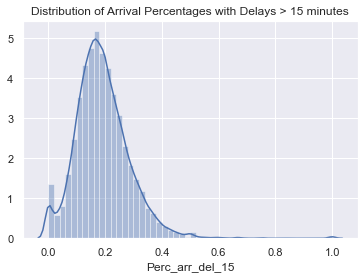

In [15]:
sns.set(); Top_50_Airports.Perc_arr_del_15
x = Top_50_Airports.Perc_arr_del_15
ax = sns.distplot(x)
ax.set_title('Distribution of Arrival Percentages with Delays > 15 minutes')

(0.0, 1.0)

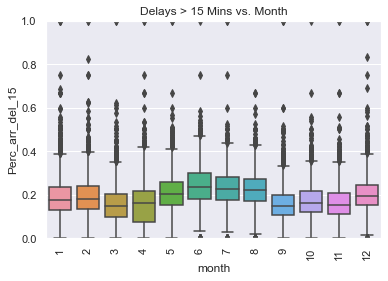

In [16]:
chart = sns.boxplot(x="month", y="Perc_arr_del_15", data=Top_50_Airports)
for item in chart.get_xticklabels():
    item.set_rotation(90)
chart.set_title('Delays > 15 Mins vs. Month')
chart.set_ylim([0, 1])  

(0.0, 0.6)

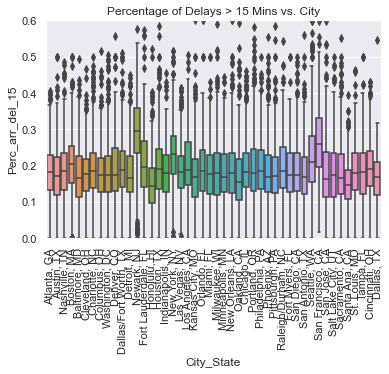

In [17]:
chart = sns.boxplot(x="City_State", y="Perc_arr_del_15", data=Top_50_Airports)
for item in chart.get_xticklabels():
    item.set_rotation(90)
chart.set_title('Percentage of Delays > 15 Mins vs. City')
chart.set_ylim([0, .6])  

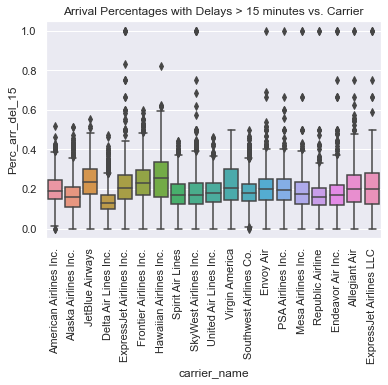

In [18]:
chart = sns.boxplot(x="carrier_name", y="Perc_arr_del_15", data=Top_50_Airports)
for item in chart.get_xticklabels():
    item.set_rotation(90)
chart.set_title('Arrival Percentages with Delays > 15 minutes vs. Carrier')
plt.show()

Text(0.5, 1.0, 'Arrival Percentages with Delays > 15 minutes vs. Month')

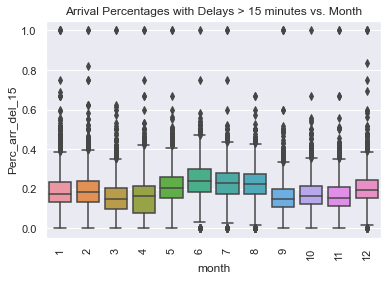

In [19]:
chart = sns.boxplot(x="month", y="Perc_arr_del_15", data=Top_50_Airports)
for item in chart.get_xticklabels():
    item.set_rotation(90)
chart.set_title('Arrival Percentages with Delays > 15 minutes vs. Month')

In [20]:
LasVegas = Top_50_Airports[Top_50_Airports['airport_name']=='Las Vegas, NV: McCarran International']

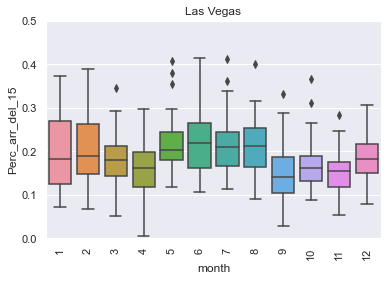

In [21]:
chart = sns.boxplot(x="month", y="Perc_arr_del_15", data=LasVegas)
for item in chart.get_xticklabels():
    item.set_rotation(90)
chart.set_ylim([0, .5])  
chart.set_title('Las Vegas')
plt.show()

In [22]:
Miami = Top_50_Airports[Top_50_Airports['airport_name']=='Miami, FL: Miami International']

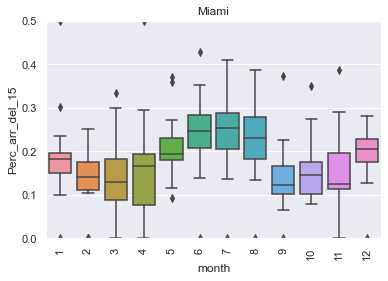

In [23]:
chart = sns.boxplot(x="month", y="Perc_arr_del_15", data=Miami)
for item in chart.get_xticklabels():
    item.set_rotation(90)
chart.set_ylim([0, .5])
chart.set_title('Miami')
plt.show()

In [24]:
Boston = Top_50_Airports[Top_50_Airports['airport_name']=='Boston, MA: Logan International']

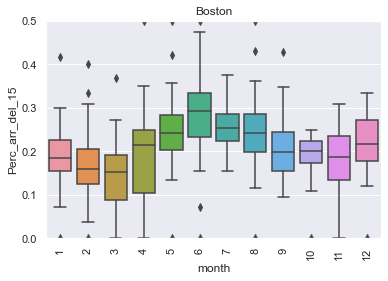

In [25]:
chart = sns.boxplot(x="month", y="Perc_arr_del_15", data=Boston)
for item in chart.get_xticklabels():
    item.set_rotation(90)
chart.set_ylim([0, .5])
chart.set_title('Boston')
plt.show()

Text(0.5, 1.0, 'Distribution of Cancelled flight percentages')

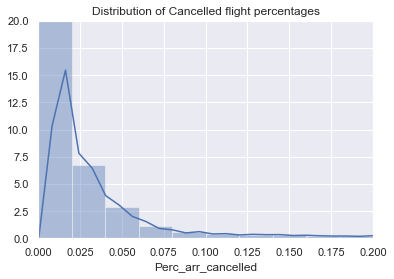

In [26]:
sns.set(); Top_50_Airports.Perc_arr_cancelled
x = Top_50_Airports.Perc_arr_cancelled
ax = sns.distplot(x)
ax.set_ylim(0, 20)
ax.set_xlim(0, 0.2)
ax.set_title('Distribution of Cancelled flight percentages') 

(0.0, 0.4)

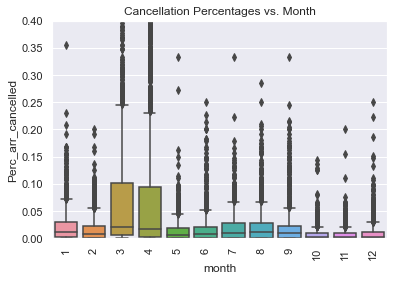

In [27]:
chart = sns.boxplot(x="month", y="Perc_arr_cancelled", data=Top_50_Airports)
for item in chart.get_xticklabels():
    item.set_rotation(90)
chart.set_title('Cancellation Percentages vs. Month')
chart.set_ylim([0, .4])  

(0.0, 0.06)

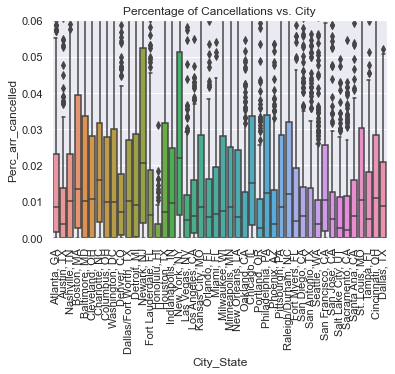

In [28]:
chart = sns.boxplot(x="City_State", y="Perc_arr_cancelled", data=Top_50_Airports)
for item in chart.get_xticklabels():
    item.set_rotation(90)
chart.set_title('Percentage of Cancellations vs. City')
chart.set_ylim([0, .06])  

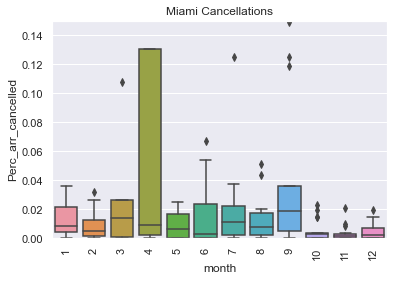

In [29]:
chart = sns.boxplot(x="month", y="Perc_arr_cancelled", data=Miami)
for item in chart.get_xticklabels():
    item.set_rotation(90)
chart.set_ylim([0, .15])
chart.set_title('Miami Cancellations')
plt.show()

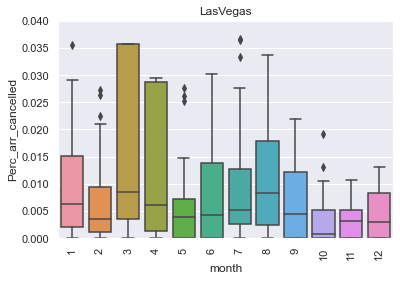

In [30]:
chart = sns.boxplot(x="month", y="Perc_arr_cancelled", data=LasVegas)
for item in chart.get_xticklabels():
    item.set_rotation(90)
chart.set_ylim([0, .04])
chart.set_title('LasVegas')
plt.show()

# Association Rules Mining

In [31]:
#Perc_security_ct and Perc_arr_diverted percentages are too low for meaningful analysis

columns = ['month','City_State','carrier_name','Perc_arr_del_15', 'Perc_carrier_ct',
           'Perc_weather_ct','Perc_nas_ct', 'Perc_late_aircraft_ct','Perc_arr_cancelled']
ARM = Top_50_Airports[columns]
ARM = ARM.fillna(0)
print(ARM.describe())

              month  Perc_arr_del_15  Perc_carrier_ct  Perc_weather_ct  \
count  21196.000000     21196.000000     21196.000000     21196.000000   
mean       6.064871         0.190623         0.060041         0.006020   
std        3.516683         0.095960         0.050287         0.013378   
min        1.000000         0.000000         0.000000         0.000000   
25%        3.000000         0.129170         0.033857         0.000000   
50%        6.000000         0.181130         0.050687         0.002911   
75%        9.000000         0.241935         0.072871         0.007816   
max       12.000000         1.000000         1.000000         1.000000   

        Perc_nas_ct  Perc_late_aircraft_ct  Perc_arr_cancelled  
count  21196.000000           21196.000000        21196.000000  
mean       0.063610               0.060570            0.030992  
std        0.055308               0.043093            0.087444  
min        0.000000               0.000000            0.000000  
25%     

In [32]:
#Create 4 equal bins
bins_Perc_arr_del_15 = [-1, .13, .182, .25, 1.1]
bins_Perc_carrier_ct  = [-1, .034, .051, .073, 1.1]
bins_Perc_weather_ct = [-1, 0.000001, .003, .008, 1.1]
bins_Perc_nas_ct = [-1, .030, .052, .083, 1.1]
bins_Perc_late_aircraft_ct  = [-1, .032, .056, .084, 1]
bins_Perc_arr_cancelled = [-1, .000001, .008, .024, 1.1]

#Create Define Labels
labels_Perc_arr_del_15 = ['LOWEST_Delay_Over_15','LOW_Delay_Over_15','HIGH_Delay_Over_15','HIGHEST_Delay_Over_15']
labels_Perc_carrier_ct  = ['LOWEST_Carrier_Delay','LOW_Carrier_Delay','HIGH_Carrier_Delay','HIGHEST_Carrier_Delay']
labels_Perc_weather_ct = ['LOWEST_Weather_Delay','LOW_Weather_Delay','HIGH_Weather_Delay','HIGHEST_Weather_Delay']
labels_Perc_nas_ct = ['LOWEST_NAS_Delay','LOW_NAS_Delay','HIGH_NAS_Delay','HIGHEST_NAS_Delay']
labels_Perc_late_aircraft_ct  = ['LOWEST_LateAircraft_Delay','LOW_LateAircraft_Delay',
                                 'HIGH_LateAircraft_Delay','HIGHEST_LateAircraft_Delay']
labels_Perc_arr_cancelled = ['LOWEST_Cancellation','LOW_Cancellation','HIGH_Cancellation','HIGHEST_Cancellation']

#Discretize
ARM['Perc_arr_del_15'] = pd.cut(ARM['Perc_arr_del_15'],bins = bins_Perc_arr_del_15, labels = labels_Perc_arr_del_15)
ARM['Perc_carrier_ct'] = pd.cut(ARM['Perc_carrier_ct'],bins = bins_Perc_carrier_ct, labels = labels_Perc_carrier_ct)
ARM['Perc_weather_ct'] = pd.cut(ARM['Perc_weather_ct'],bins = bins_Perc_weather_ct, labels = labels_Perc_weather_ct)
ARM['Perc_nas_ct'] = pd.cut(ARM['Perc_nas_ct'],bins = bins_Perc_nas_ct, labels = labels_Perc_nas_ct)
ARM['Perc_late_aircraft_ct'] = pd.cut(ARM['Perc_late_aircraft_ct'],bins = bins_Perc_late_aircraft_ct, labels = labels_Perc_late_aircraft_ct)
ARM['Perc_arr_cancelled'] = pd.cut(ARM['Perc_arr_cancelled'],bins = bins_Perc_arr_cancelled, labels = labels_Perc_arr_cancelled)

In [33]:
ARM

,month,City_State,carrier_name,Perc_arr_del_15,Perc_carrier_ct,Perc_weather_ct,Perc_nas_ct,Perc_late_aircraft_ct,Perc_arr_cancelled
3,1,"Atlanta, GA",American Airlines Inc.,HIGH_Delay_Over_15,HIGH_Carrier_Delay,LOW_Weather_Delay,HIGH_NAS_Delay,HIGH_LateAircraft_Delay,HIGH_Cancellation
4,1,"Austin, TX",American Airlines Inc.,LOW_Delay_Over_15,HIGH_Carrier_Delay,HIGH_Weather_Delay,LOW_NAS_Delay,LOW_LateAircraft_Delay,LOW_Cancellation
6,1,"Nashville, TN",American Airlines Inc.,LOW_Delay_Over_15,HIGH_Carrier_Delay,LOW_Weather_Delay,LOW_NAS_Delay,LOW_LateAircraft_Delay,LOW_Cancellation
8,1,"Boston, MA",American Airlines Inc.,LOW_Delay_Over_15,HIGH_Carrier_Delay,HIGH_Weather_Delay,HIGH_NAS_Delay,LOW_LateAircraft_Delay,HIGH_Cancellation
10,1,"Baltimore, MD",American Airlines Inc.,HIGH_Delay_Over_15,HIGH_Carrier_Delay,LOW_Weather_Delay,HIGH_NAS_Delay,HIGHEST_LateAircraft_Delay,LOWEST_Cancellation
...,...,...,...,...,...,...,...,...,...
60700,1,"New Orleans, LA",Envoy Air,LOWEST_Delay_Over_15,LOWEST_Carrier_Delay,LOWEST_Weather_Delay,LOWEST_NAS_Delay,LOWEST_LateAircraft_Delay,LOWEST_Cancellation
60704,1,"Chicago, IL",Envoy Air,HIGH_Delay_Over_15,LOW_Carrier_Delay,HIGHEST_Weather_Delay,HIGH_NAS_Delay,HIGHEST_LateAircraft_Delay,HIGHEST_Cancellation
60708,1,"Pittsburgh, PA",Envoy Air,HIGHEST_Delay_Over_15,LOW_Carrier_Delay,HIGHEST_Weather_Delay,HIGHEST_NAS_Delay,HIGHEST_LateAircraft_Delay,HIGHEST_Cancellation
60712,1,"Raleigh/Durham, NC",Envoy Air,HIGHEST_Delay_Over_15,HIGH_Carrier_Delay,LOWEST_Weather_Delay,HIGHEST_NAS_Delay,HIGHEST_LateAircraft_Delay,HIGH_Cancellation


In [34]:
#Export to CSV for analysis in R
ARM.to_csv('ARM.csv')

# Clustering

In [42]:
columns = ['month','City_State','carrier_name','Perc_arr_del_15', 'Perc_carrier_ct',
           'Perc_weather_ct','Perc_nas_ct', 'Perc_late_aircraft_ct','Perc_arr_cancelled']
Cluster = Top_50_Airports[columns]
Cluster 

,month,City_State,carrier_name,Perc_arr_del_15,Perc_carrier_ct,Perc_weather_ct,Perc_nas_ct,Perc_late_aircraft_ct,Perc_arr_cancelled
3,1,"Atlanta, GA",American Airlines Inc.,0.183453,0.065270,0.002104,0.055836,0.058471,0.021583
4,1,"Austin, TX",American Airlines Inc.,0.172840,0.065501,0.003923,0.049849,0.052209,0.002743
6,1,"Nashville, TN",American Airlines Inc.,0.148990,0.057500,0.000051,0.048081,0.043384,0.005051
8,1,"Boston, MA",American Airlines Inc.,0.163868,0.055674,0.003028,0.057868,0.047298,0.023919
10,1,"Baltimore, MD",American Airlines Inc.,0.212190,0.059210,0.000451,0.063860,0.086298,0.000000
...,...,...,...,...,...,...,...,...,...
60700,1,"New Orleans, LA",Envoy Air,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
60704,1,"Chicago, IL",Envoy Air,0.233072,0.035578,0.011294,0.081049,0.105023,0.148750
60708,1,"Pittsburgh, PA",Envoy Air,0.314176,0.044406,0.014406,0.101992,0.153372,0.045977
60712,1,"Raleigh/Durham, NC",Envoy Air,0.309524,0.055992,0.000000,0.104167,0.148810,0.023810


In [43]:
columns_Month = ['month','City_State','carrier_name','Perc_arr_del_15', 'Perc_carrier_ct',
           'Perc_weather_ct','Perc_nas_ct', 'Perc_late_aircraft_ct','Perc_arr_cancelled']
Cluster_Month = Cluster[columns_Month]
Cluster_Month

,month,City_State,carrier_name,Perc_arr_del_15,Perc_carrier_ct,Perc_weather_ct,Perc_nas_ct,Perc_late_aircraft_ct,Perc_arr_cancelled
3,1,"Atlanta, GA",American Airlines Inc.,0.183453,0.065270,0.002104,0.055836,0.058471,0.021583
4,1,"Austin, TX",American Airlines Inc.,0.172840,0.065501,0.003923,0.049849,0.052209,0.002743
6,1,"Nashville, TN",American Airlines Inc.,0.148990,0.057500,0.000051,0.048081,0.043384,0.005051
8,1,"Boston, MA",American Airlines Inc.,0.163868,0.055674,0.003028,0.057868,0.047298,0.023919
10,1,"Baltimore, MD",American Airlines Inc.,0.212190,0.059210,0.000451,0.063860,0.086298,0.000000
...,...,...,...,...,...,...,...,...,...
60700,1,"New Orleans, LA",Envoy Air,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
60704,1,"Chicago, IL",Envoy Air,0.233072,0.035578,0.011294,0.081049,0.105023,0.148750
60708,1,"Pittsburgh, PA",Envoy Air,0.314176,0.044406,0.014406,0.101992,0.153372,0.045977
60712,1,"Raleigh/Durham, NC",Envoy Air,0.309524,0.055992,0.000000,0.104167,0.148810,0.023810


In [44]:
data = Cluster_Month
data = data.dropna(axis=0)
#data = data.set_index('City_State')
#X = data.drop(['month'], axis=1)
#X_train, X_test, y_train, y_test = train_test_split(X, data.month, test_size=0.3, random_state=42)
#X_train
data

,month,City_State,carrier_name,Perc_arr_del_15,Perc_carrier_ct,Perc_weather_ct,Perc_nas_ct,Perc_late_aircraft_ct,Perc_arr_cancelled
3,1,"Atlanta, GA",American Airlines Inc.,0.183453,0.065270,0.002104,0.055836,0.058471,0.021583
4,1,"Austin, TX",American Airlines Inc.,0.172840,0.065501,0.003923,0.049849,0.052209,0.002743
6,1,"Nashville, TN",American Airlines Inc.,0.148990,0.057500,0.000051,0.048081,0.043384,0.005051
8,1,"Boston, MA",American Airlines Inc.,0.163868,0.055674,0.003028,0.057868,0.047298,0.023919
10,1,"Baltimore, MD",American Airlines Inc.,0.212190,0.059210,0.000451,0.063860,0.086298,0.000000
...,...,...,...,...,...,...,...,...,...
60700,1,"New Orleans, LA",Envoy Air,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
60704,1,"Chicago, IL",Envoy Air,0.233072,0.035578,0.011294,0.081049,0.105023,0.148750
60708,1,"Pittsburgh, PA",Envoy Air,0.314176,0.044406,0.014406,0.101992,0.153372,0.045977
60712,1,"Raleigh/Durham, NC",Envoy Air,0.309524,0.055992,0.000000,0.104167,0.148810,0.023810


In [45]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
#import sklearn.cluster.hierarchical as hclust
from sklearn import preprocessing
import seaborn as sns

In [46]:
data = data.reset_index()
data

,index,month,City_State,carrier_name,Perc_arr_del_15,Perc_carrier_ct,Perc_weather_ct,Perc_nas_ct,Perc_late_aircraft_ct,Perc_arr_cancelled
0,3,1,"Atlanta, GA",American Airlines Inc.,0.183453,0.065270,0.002104,0.055836,0.058471,0.021583
1,4,1,"Austin, TX",American Airlines Inc.,0.172840,0.065501,0.003923,0.049849,0.052209,0.002743
2,6,1,"Nashville, TN",American Airlines Inc.,0.148990,0.057500,0.000051,0.048081,0.043384,0.005051
3,8,1,"Boston, MA",American Airlines Inc.,0.163868,0.055674,0.003028,0.057868,0.047298,0.023919
4,10,1,"Baltimore, MD",American Airlines Inc.,0.212190,0.059210,0.000451,0.063860,0.086298,0.000000
...,...,...,...,...,...,...,...,...,...,...
21145,60700,1,"New Orleans, LA",Envoy Air,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
21146,60704,1,"Chicago, IL",Envoy Air,0.233072,0.035578,0.011294,0.081049,0.105023,0.148750
21147,60708,1,"Pittsburgh, PA",Envoy Air,0.314176,0.044406,0.014406,0.101992,0.153372,0.045977
21148,60712,1,"Raleigh/Durham, NC",Envoy Air,0.309524,0.055992,0.000000,0.104167,0.148810,0.023810


In [47]:
features = data.drop(['month', 'City_State', 'carrier_name'],axis=1)
features

,index,Perc_arr_del_15,Perc_carrier_ct,Perc_weather_ct,Perc_nas_ct,Perc_late_aircraft_ct,Perc_arr_cancelled
0,3,0.183453,0.065270,0.002104,0.055836,0.058471,0.021583
1,4,0.172840,0.065501,0.003923,0.049849,0.052209,0.002743
2,6,0.148990,0.057500,0.000051,0.048081,0.043384,0.005051
3,8,0.163868,0.055674,0.003028,0.057868,0.047298,0.023919
4,10,0.212190,0.059210,0.000451,0.063860,0.086298,0.000000
...,...,...,...,...,...,...,...
21145,60700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
21146,60704,0.233072,0.035578,0.011294,0.081049,0.105023,0.148750
21147,60708,0.314176,0.044406,0.014406,0.101992,0.153372,0.045977
21148,60712,0.309524,0.055992,0.000000,0.104167,0.148810,0.023810


In [48]:
scaler = preprocessing.MinMaxScaler()
features_normal = scaler.fit_transform(features)
features_normal

array([[0.00000000e+00, 1.83453237e-01, 6.52697842e-02, ...,
        5.58363309e-02, 5.90618414e-02, 2.18427668e-02],
       [1.64706657e-05, 1.72839506e-01, 6.55006859e-02, ...,
        4.98491084e-02, 5.27358634e-02, 2.77653825e-03],
       [4.94119972e-05, 1.48989899e-01, 5.75000000e-02, ...,
        4.80808081e-02, 4.38220590e-02, 5.11135451e-03],
       ...,
       [9.99851764e-01, 3.14176245e-01, 4.44061303e-02, ...,
        1.01992337e-01, 1.54920856e-01, 4.65309514e-02],
       [9.99917647e-01, 3.09523810e-01, 5.59920635e-02, ...,
        1.04166667e-01, 1.50312650e-01, 2.40963855e-02],
       [1.00000000e+00, 1.53846154e-01, 4.46153846e-02, ...,
        7.38461538e-02, 1.12665113e-02, 1.94624652e-01]])

In [49]:
features.isnull().sum().sum()

0

In [50]:
pd.DataFrame(features_normal).describe()

,0,1,2,3,4,5,6
count,21150.000000,21150.000000,21150.000000,21150.000000,21150.000000,21150.000000,21150.000000
mean,0.488185,0.191037,0.060172,0.006033,0.063748,0.061315,0.029663
std,0.291490,0.095652,0.050263,0.013389,0.055289,0.043482,0.078505
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.236029,0.129500,0.033992,0.000000,0.029444,0.031767,0.000000
50%,0.483356,0.181474,0.050746,0.002924,0.051592,0.056250,0.007707
75%,0.739710,0.241935,0.072955,0.007829,0.082928,0.084686,0.024096
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
inertia = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(features_normal)
    kmeanModel.fit(features_normal)
    inertia.append(kmeanModel.inertia_)

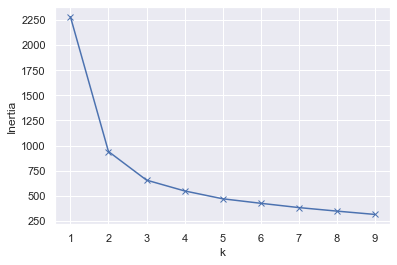

In [52]:
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

In [53]:
kmeans = KMeans(n_clusters=4).fit(features_normal)

In [54]:
labels = pd.DataFrame(kmeans.labels_) #This is where the label output of the KMeans we just ran lives. Make it a dataframe so we can concatenate back to the original data
labeled_months = pd.concat((features,labels),axis=1)
labeled_months = labeled_months.rename({0:'labels'},axis=1)

In [56]:
#labeled_months = labeled_months.drop(['index'], axis=1)
#labeled_months = labeled_months.drop(['level_0'], axis=1)
labeled_months.head()

,Perc_arr_del_15,Perc_carrier_ct,Perc_weather_ct,Perc_nas_ct,Perc_late_aircraft_ct,Perc_arr_cancelled,labels
0,0.183453,0.065270,0.002104,0.055836,0.058471,0.021583,1
1,0.172840,0.065501,0.003923,0.049849,0.052209,0.002743,1
2,0.148990,0.057500,0.000051,0.048081,0.043384,0.005051,1
3,0.163868,0.055674,0.003028,0.057868,0.047298,0.023919,1
4,0.212190,0.059210,0.000451,0.063860,0.086298,0.000000,1


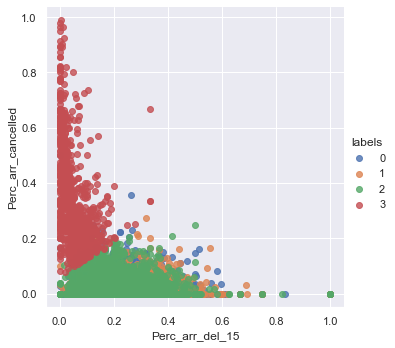

In [57]:
sns.lmplot(x='Perc_arr_del_15',y='Perc_arr_cancelled',data=labeled_months,hue='labels',fit_reg=False)

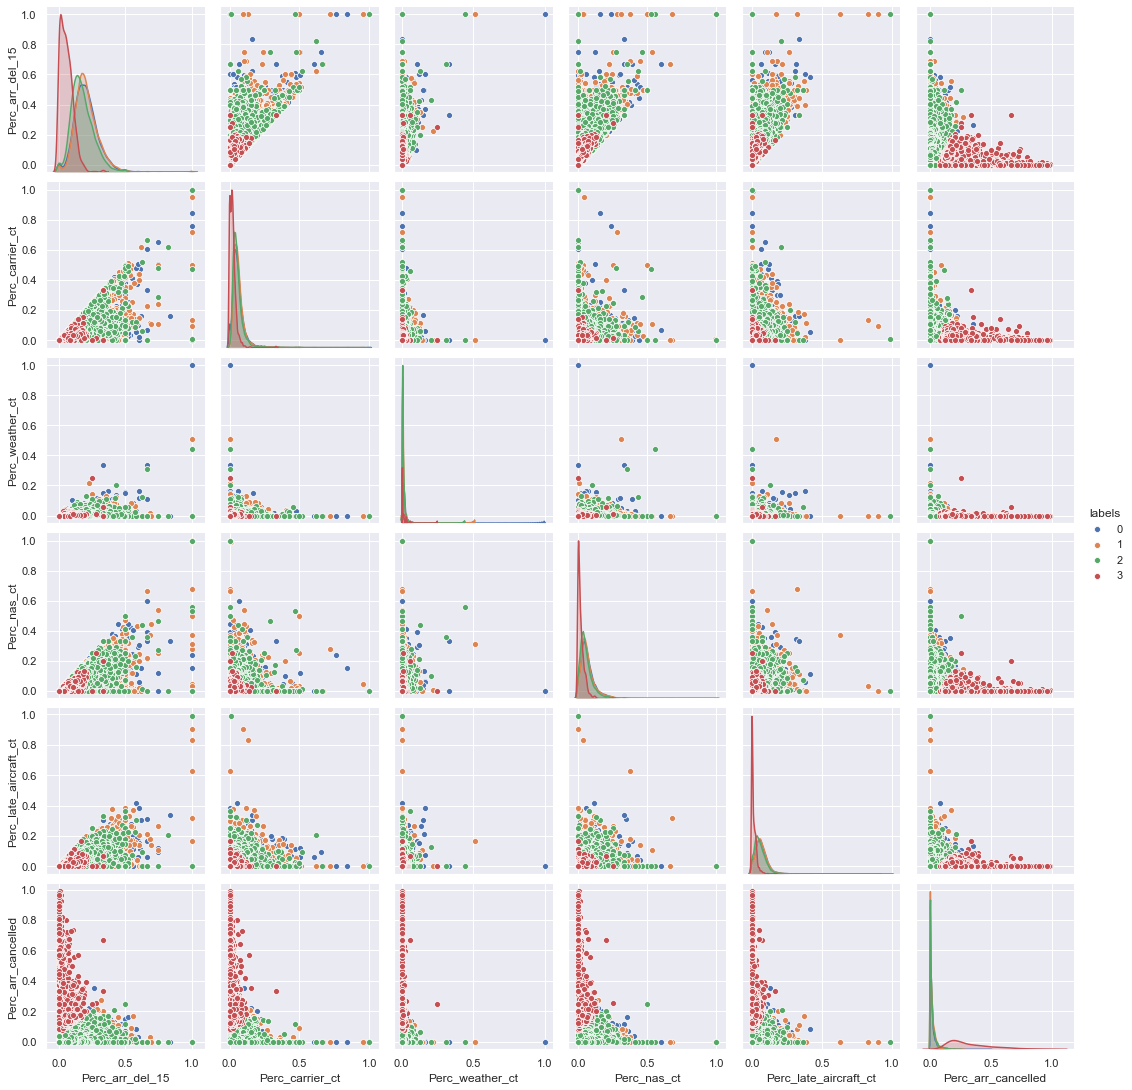

In [58]:
sns.pairplot(labeled_months,hue='labels')

In [59]:
labeled_months['Constant'] = "Data" #This is just to add something constant for the strip/swarm plots' X axis. Can be anything you want it to be.

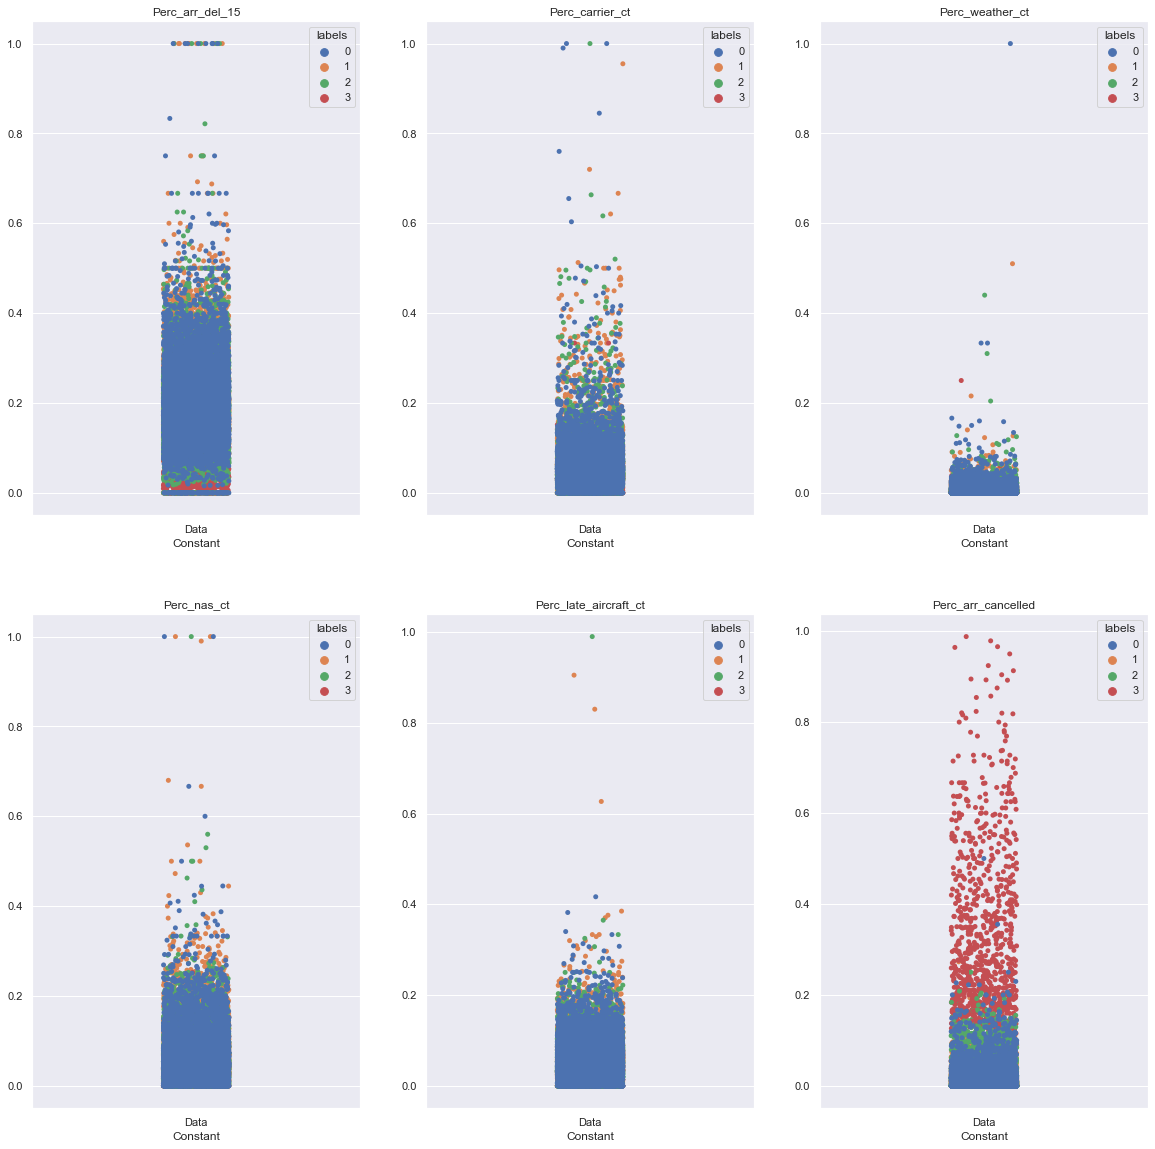

In [60]:
f, axes = plt.subplots(2, 3, figsize=(20, 20), sharex=False) #create a 4x5 grid of empty figures where we will plot our feature plots. We will have a couple empty ones.
#f.subplots_adjust(hspace=0.2, wspace=0.7) #Scooch em apart, give em some room
#In this for loop, I step through every column that I want to plot. This is a 4x5 grid, so I split this up by rows of 5 in the else if statements
for i in range(0,len(list(labeled_months))-2): #minus two because I don't want to plot labels or constant
    col = labeled_months.columns[i]
    if i < 3:
        ax = sns.stripplot(x=labeled_months['Constant'],y=labeled_months[col].values,hue=labeled_months['labels'],jitter=True,ax=axes[0,(i)])
        ax.set_title(col)
    elif i >= 3 and i<6:
        ax = sns.stripplot(x=labeled_months['Constant'],y=labeled_months[col].values,hue=labeled_months['labels'],jitter=True,ax=axes[1,(i-3)]) #so if i=6 it is row 1 column 1
        ax.set_title(col)


In [61]:
columns = ['month','City_State','carrier_name']
Months = data[columns_Month]
Months = pd.concat((Months,labels),axis=1)
Months = Months.rename({0:'Cluster'},axis=1)
Months
Months_Sorted = Months.sort_values(['Cluster'])
pd.set_option('display.max_rows', 1000)
Months_Sorted

,month,City_State,carrier_name,Perc_arr_del_15,Perc_carrier_ct,Perc_weather_ct,Perc_nas_ct,Perc_late_aircraft_ct,Perc_arr_cancelled,Cluster
21149,1,"San Antonio, TX",Envoy Air,0.153846,0.044615,0.024615,0.073846,0.011154,0.192308,0
17009,6,"New York, NY",SkyWest Airlines Inc.,0.486842,0.077763,0.056711,0.120132,0.232368,0.026316,0
17010,6,"Las Vegas, NV",SkyWest Airlines Inc.,0.154286,0.050286,0.009143,0.036914,0.057886,0.000000,0
17011,6,"Los Angeles, CA",SkyWest Airlines Inc.,0.152190,0.033357,0.002379,0.043833,0.072485,0.001888,0
17012,6,"New York, NY",SkyWest Airlines Inc.,0.369732,0.047261,0.055441,0.118429,0.148582,0.021073,0
...,...,...,...,...,...,...,...,...,...,...
8319,3,"Santa Ana, CA",American Airlines Inc.,0.102079,0.042174,0.000000,0.034159,0.025766,0.274102,3
8320,3,"St. Louis, MO",American Airlines Inc.,0.112880,0.046657,0.002648,0.019030,0.044530,0.201158,3
8321,3,"Tampa, FL",American Airlines Inc.,0.074275,0.027763,0.001567,0.020589,0.023478,0.152174,3
8313,3,"San Antonio, TX",American Airlines Inc.,0.110526,0.049263,0.004276,0.022816,0.033974,0.209211,3


In [67]:
Months_Sorted.loc[Months_Sorted['Cluster'] == "1", 'Perc_arr_cancelled'].mean()

nan

In [76]:
print(Months_Sorted.groupby('Cluster')['Perc_arr_del_15'].mean())
print(Months_Sorted.groupby('Cluster')['Perc_carrier_ct'].mean())
print(Months_Sorted.groupby('Cluster')['Perc_weather_ct'].mean())
print(Months_Sorted.groupby('Cluster')['Perc_nas_ct'].mean())
print(Months_Sorted.groupby('Cluster')['Perc_late_aircraft_ct'].mean())
print(Months_Sorted.groupby('Cluster')['Perc_arr_cancelled'].mean())

Cluster
0    0.205826
1    0.207904
2    0.176460
3    0.055762
Name: Perc_arr_del_15, dtype: float64
Cluster
0    0.063389
1    0.065134
2    0.056682
3    0.022382
Name: Perc_carrier_ct, dtype: float64
Cluster
0    0.006958
1    0.006299
2    0.005496
3    0.001399
Name: Perc_weather_ct, dtype: float64
Cluster
0    0.069411
1    0.069647
2    0.057737
3    0.019563
Name: Perc_nas_ct, dtype: float64
Cluster
0    0.065621
1    0.066426
2    0.056197
3    0.012344
Name: Perc_late_aircraft_ct, dtype: float64
Cluster
0    0.015077
1    0.014901
2    0.017512
3    0.326246
Name: Perc_arr_cancelled, dtype: float64
